# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Guvi_collab/car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


#Task-1 We'll perform Simple linear regression for the 2 variables Mileage vs Price.

In [ ]:
x=df[['Mileage']]
y=df['Price']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


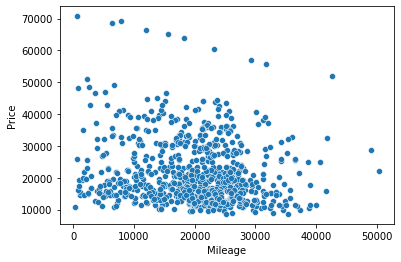

In [ ]:
sns.scatterplot(x,y)

From the scatter plot we can see that the data is not correlated well 


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
predicted_test=lr.predict(x_test)
predicted_train=lr.predict(x_train)
print("r2 score for training data set:",r2_score(y_train,predicted_train))
print("r2 score for testing data set:",r2_score(y_test,predicted_test))
print("slope:",lr.coef_)
print('intercept:',lr.intercept_)

r2 score for training data set: 0.020628177674691495
r2 score for testing data set: 0.015451276132044445
slope: [-0.16623747]
intercept: 24439.439408845108


Text(0.5, 0, 'Mileage')

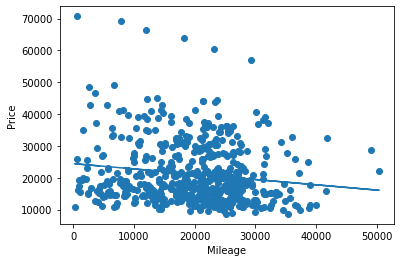

In [ ]:
plt.plot(x_train,predicted_train)
plt.scatter(x_train,y_train)
plt.ylabel('Price')
plt.xlabel('Mileage')

Text(0.5, 0, 'Mileage')

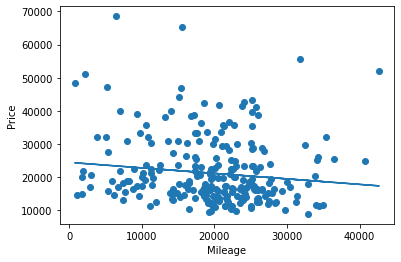

In [ ]:
plt.plot(x_test,predicted_test)
plt.scatter(x_test,y_test)
plt.ylabel('Price')
plt.xlabel('Mileage')

The R2 score is less after several iterations, we can conclude that the 2 variables are not correlated whatsover. 

#TASK 2 - Now to fit the model with several independant variables such as mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [ ]:
columns=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
x=df[columns]
y=df['Price']

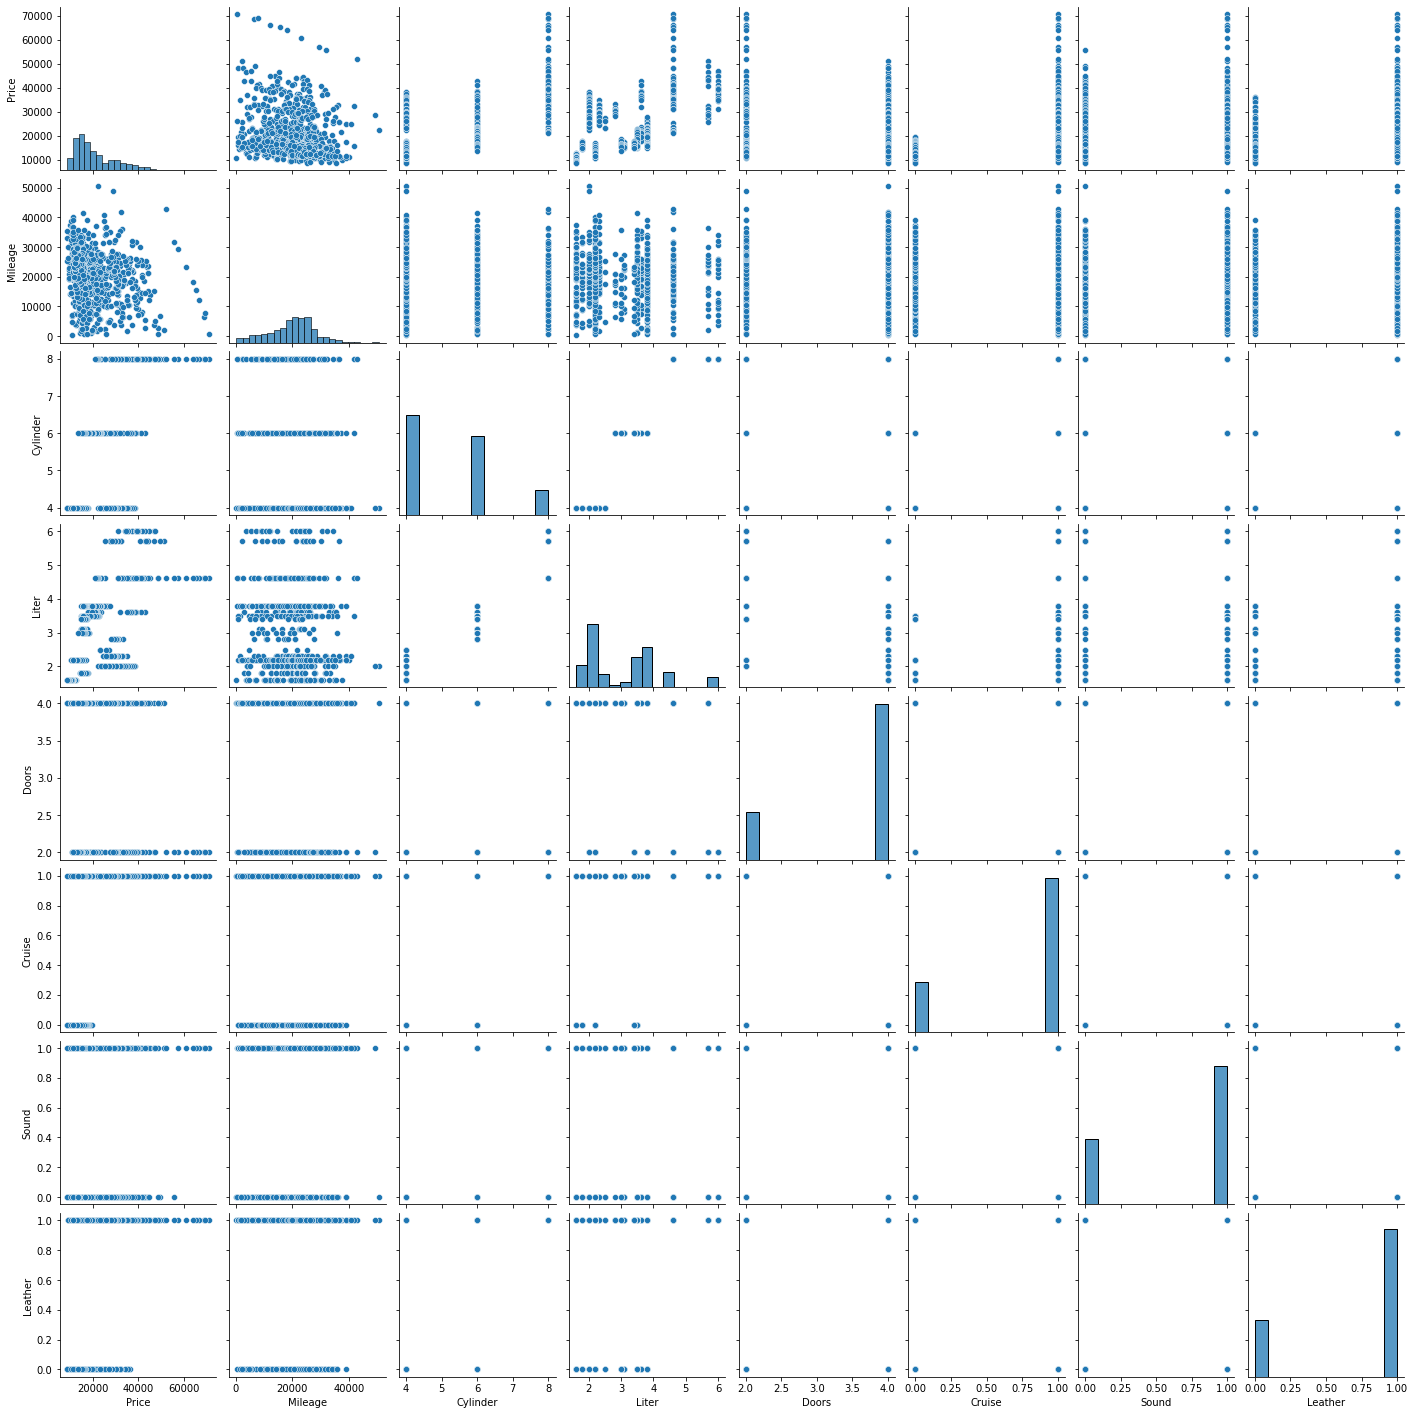

In [ ]:
sns.pairplot(df.drop(['Make','Model','Trim','Type'],axis=1))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
r2score_tst_list=[]
r2score_train_list=[]
for i in range(0,5):
  lr=Lasso()
  lr.fit(x_train,y_train)
  predicted_test=lr.predict(x_test)
  predicted_train=lr.predict(x_train)
  r2score_test=r2_score(y_test,predicted_test)
  r2score_tst_list.append(r2score_test)
  r2score_train=r2_score(y_train,predicted_train)
  r2score_train_list.append(r2score_train)

In [ ]:
print("Avg r2 score for training data set:",(sum(r2score_train_list)/len(r2score_train_list)))
print("Avg r2 score for testing data set:",(sum(r2score_tst_list)/len(r2score_tst_list)))
print("slope:",lr.coef_)
print('intercept:',lr.intercept_)

Avg r2 score for training data set: 0.44016776556033876
Avg r2 score for testing data set: 0.4472163419506174
slope: [-1.77609558e-01  4.43102671e+03 -1.69882027e+03 -2.15659785e+03
  6.48058929e+03 -1.76659006e+03  2.87526540e+03]
intercept: 8789.644195914196


The R2 score we are getting for the test and train is almost similar but the value is around 0.4 so we can conclude that the data is not correlate with eachother well.

#TASK-3 To convert all the  categorical variables into numerical and to fit regression model for the data.

In [ ]:
df1=df

In [ ]:
#Data is having lot of categorical type variables, hence we need to convert it into numerical. For this we will use label encoding 
category_col=['Make','Model','Trim',"Type"]
for column in category_col:
    df1[column]=LabelEncoder().fit_transform(df1[column])
df1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,44,3,6,3.1,4,1,0,1


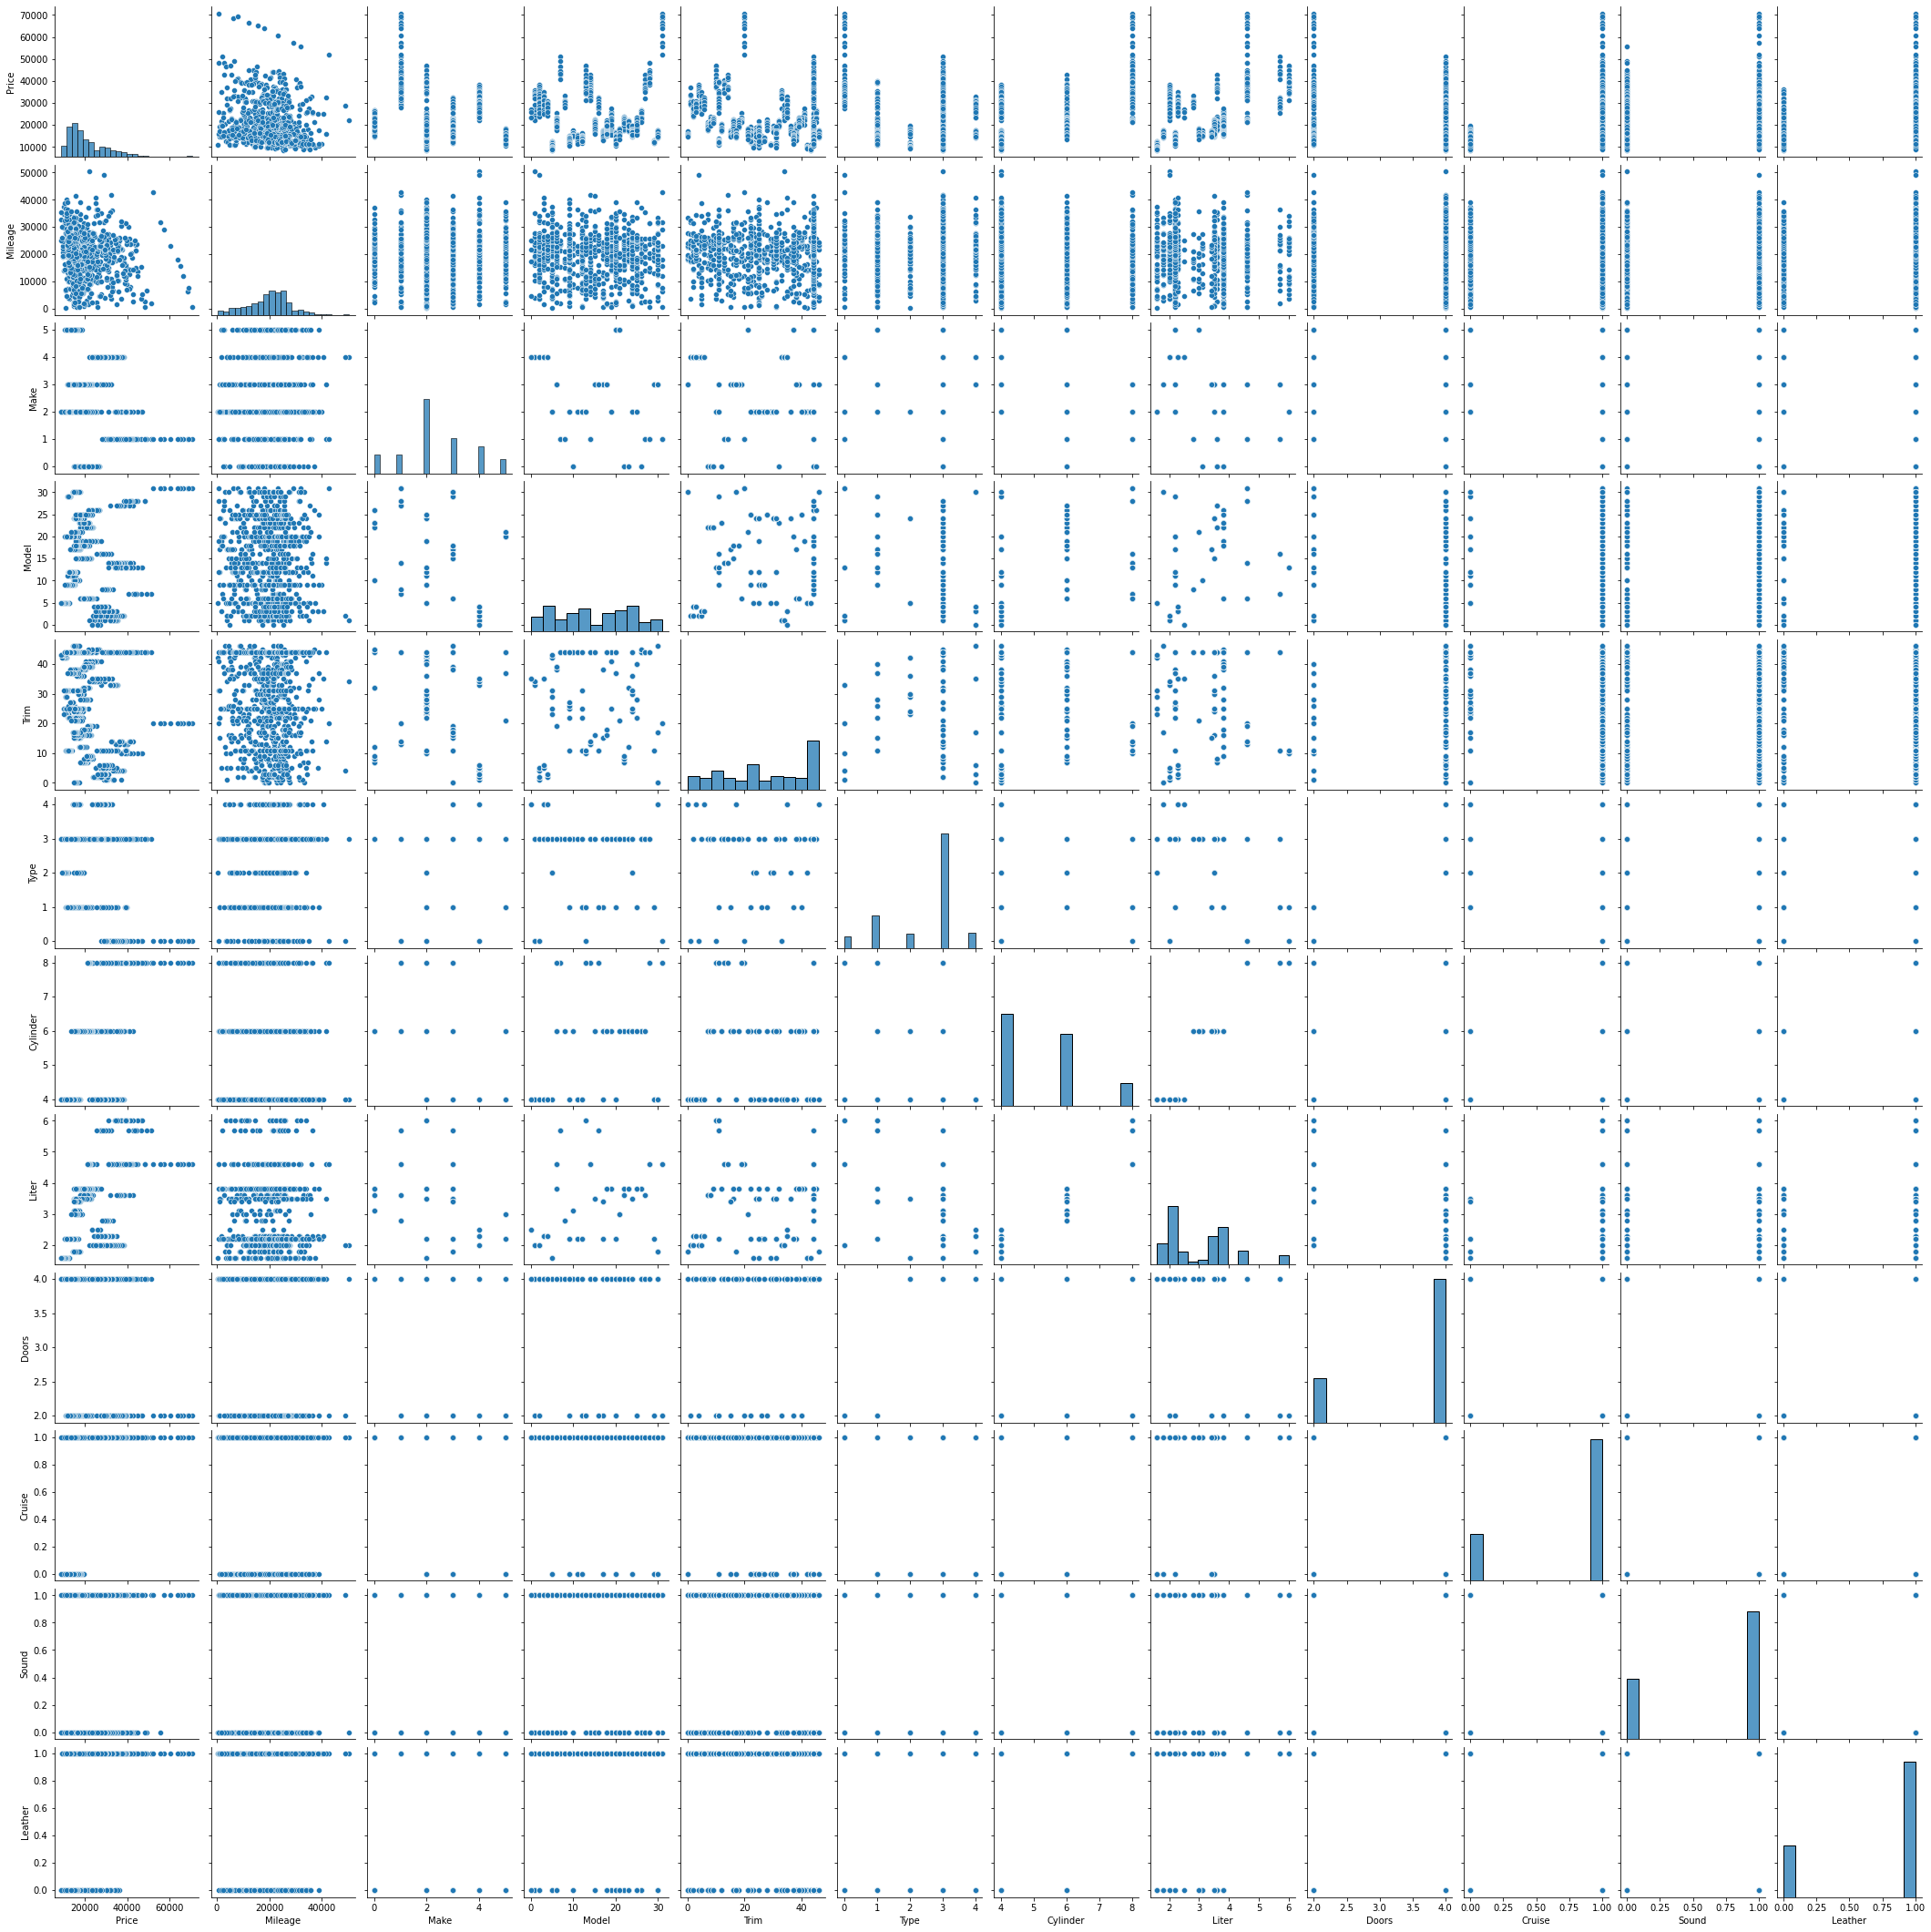

In [ ]:
sns.pairplot(df)

In [ ]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predicted_test=lr.predict(x_test)
predicted_train=lr.predict(x_train)
r2score_test=r2_score(y_test,predicted_test)
r2score_train=r2_score(y_train,predicted_train)

In [ ]:
print("r2 score for training data set:",r2score_train)
print("r2 score for testing data set:",r2score_test)
print("slope:",lr.coef_)
print('intercept:',lr.intercept_)

r2 score for training data set: 0.49448447024153885
r2 score for testing data set: 0.5101508679867808
slope: [-1.63151430e-01  7.34042348e+02 -1.65691571e+02 -8.89262774e+01
 -6.38559369e+02  4.89431228e+03 -7.76342597e+02 -5.18868351e+02
  5.04682685e+03 -1.39243572e+03  2.43386827e+03]
intercept: 2946.776364894431


By converting object type into categorical we can able to get quite good R2 score comparitively. But still the R2 score is not above 0.80.